# US School Analysis

## Start with imports and reading in your data

In [83]:
# Include all your imports here
import pandas as pd
from pathlib import Path
%matplotlib inline
import seaborn as sns

In [109]:
# Load the Public school dataset
path1 = Path('Resources/public_school_data.csv')
data = pd.read_csv(path1)
data.head()

,NCESSCH,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
0,10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
1,10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
2,10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
3,10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
4,10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [110]:
# Load the Public school locations dataset
path2 = Path('Resources/public_school_locations.csv')
locations = pd.read_csv(path2)
locations.head()


,ID,LATCOD,LONCOD
0,10000500870,34.2602,-86.206200
1,10000500871,34.2622,-86.204900
2,10000500879,34.2733,-86.220100
3,10000500889,34.2527,-86.221806
4,10000501616,34.2898,-86.193300


In [86]:
# Load the Public school data dictionary file
path3 = Path('Resources/school_data_dictionary.csv')
dictionary = pd.read_csv(path3)
dictionary.head()


,Fields,Field Descriptions
0,OBJECTID,OBJECTID
1,Shape,Shape
2,NCESSCH,Unique School ID
3,SURVYEAR,Year corresponding to survey record
4,STABR,Postal state abbreviation code


## Data Exploration and Preparation

In [87]:
# Use an .isin() function to keep only fields that appear in the main public_school_data.csv and identify the unique id column 
dictionary = dictionary[dictionary["Fields"].isin(data.columns)]
dictionary.head(25)


,Fields,Field Descriptions
2,NCESSCH,Unique School ID
12,LSTATE,Location state
21,SCHOOL_LEVEL,School level
25,SCHOOL_TYPE_TEXT,School type (description)
51,TOTAL,Total students all grades (includes AE)
53,FTE,Total Teachers
54,STUTERATIO,Student teacher ratio
57,AM,All Students - American Indian/Alaska Native
60,AS,All Students - Asian
63,BL,All Students - Black or African American


In [88]:
# Ensuring the selected column 
is indeed a unique identifier by checking the number of uniqe values and comparing it to the number of rows in the dataframe
data["NCESSCH"].unique()
locations["ID"].unique()



array([ 10000500870,  10000500871,  10000500879, ..., 780003000027,
       780003000033, 780003000034], dtype=int64)

In [111]:
# Changing the names of the unique ID column in both the location data and public school data to match and set them as index
data = data.rename(columns={'NCESSCH': 'ID'})
data.set_index(data['ID'], inplace=True)
locations.set_index(locations['ID'], inplace=True)

data = data.drop('ID', axis=1)


In [112]:
# Checking work
data.head()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
ID,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [91]:
# Checking work
locations.head()

,ID,LATCOD,LONCOD
ID,,,
10000500870,10000500870,34.2602,-86.206200
10000500871,10000500871,34.2622,-86.204900
10000500879,10000500879,34.2733,-86.220100
10000500889,10000500889,34.2527,-86.221806
10000501616,10000501616,34.2898,-86.193300


In [113]:
# Join the location and data dataframes together
schooldata = pd.concat([data, locations], axis="columns", join="inner")
schooldata


,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,ID,LATCOD,LONCOD
ID,,,,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,10000500870,34.260200,-86.206200
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,10000500871,34.262200,-86.204900
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,10000500879,34.273300,-86.220100
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,10000500889,34.252700,-86.221806
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,10000501616,34.289800,-86.193300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780003000024,VI,Elementary,Regular school,328.0,26.0,12.62,NaN,7.0,254.0,NaN,59.0,2.0,6.0,780003000024,18.341950,-64.917602
780003000026,VI,Elementary,Regular school,477.0,25.0,19.08,1.0,4.0,394.0,2.0,64.0,3.0,9.0,780003000026,18.338742,-64.952483
780003000027,VI,Elementary,Regular school,397.0,29.0,13.69,1.0,7.0,322.0,1.0,57.0,NaN,9.0,780003000027,18.354782,-64.899024


In [93]:
# Get the value counts for the school type column
schooldata["SCHOOL_TYPE_TEXT"].value_counts()

Regular school                  91595
Alternative Education School     5588
Special education school         1946
Career and Technical School      1593
Name: SCHOOL_TYPE_TEXT, dtype: int64

In [114]:
# Create a subset of the dataframe that only includes regular schools ensure it was successful by comparing rows in the subset to the value counts above
regschools = schooldata.loc[schooldata["SCHOOL_TYPE_TEXT"] == 'Regular school']
regschools


,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,ID,LATCOD,LONCOD
ID,,,,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,10000500870,34.260200,-86.206200
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,10000500871,34.262200,-86.204900
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,10000500879,34.273300,-86.220100
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,10000500889,34.252700,-86.221806
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,10000501616,34.289800,-86.193300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780003000024,VI,Elementary,Regular school,328.0,26.0,12.62,NaN,7.0,254.0,NaN,59.0,2.0,6.0,780003000024,18.341950,-64.917602
780003000026,VI,Elementary,Regular school,477.0,25.0,19.08,1.0,4.0,394.0,2.0,64.0,3.0,9.0,780003000026,18.338742,-64.952483
780003000027,VI,Elementary,Regular school,397.0,29.0,13.69,1.0,7.0,322.0,1.0,57.0,NaN,9.0,780003000027,18.354782,-64.899024


## Data Cleaning and dealing with nulls

In [95]:
# Checked for nulls. Determined that the Student race columns (AM, AS, BL, HP, HI, TR, WH) can be changed to 0 from null.
regschools.isnull().sum()

LSTATE                  0
SCHOOL_LEVEL            0
SCHOOL_TYPE_TEXT        0
TOTAL                 868
FTE                  6653
STUTERATIO            532
AM                  22158
AS                  11894
BL                   7059
HP                  32405
HI                   2257
TR                   4972
WH                   2368
ID                      0
LATCOD                  0
LONCOD                  0
dtype: int64

In [115]:
# Filling some of the columns with 0 where it makes sense
nulls_by_race = {'AM': 0, 'AS': 0, 'BL': 0, 'HP': 0, 'HI': 0, 'TR': 0, 'WH': 0}
regschools = regschools.fillna(value=nulls_by_race)

In [97]:
# Verify changes to nulls and prepare to drop na
regschools.isnull().sum()

LSTATE                 0
SCHOOL_LEVEL           0
SCHOOL_TYPE_TEXT       0
TOTAL                868
FTE                 6653
STUTERATIO           532
AM                     0
AS                     0
BL                     0
HP                     0
HI                     0
TR                     0
WH                     0
ID                     0
LATCOD                 0
LONCOD                 0
dtype: int64

In [116]:
# Drop remaining nulls
#As the purpose of this task is to analyze and evaluate the student-to-teacher ratio, I determined to drop those rows
nullregschools = regschools.dropna()

In [99]:
# Verifying changes to nulls and no nulls should remain
nullregschools.isnull().sum()

LSTATE              0
SCHOOL_LEVEL        0
SCHOOL_TYPE_TEXT    0
TOTAL               0
FTE                 0
STUTERATIO          0
AM                  0
AS                  0
BL                  0
HP                  0
HI                  0
TR                  0
WH                  0
ID                  0
LATCOD              0
LONCOD              0
dtype: int64

In [100]:
nullregschools

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,ID,LATCOD,LONCOD
ID,,,,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,10000500870,34.260200,-86.206200
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,10000500871,34.262200,-86.204900
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,10000500879,34.273300,-86.220100
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,10000500889,34.252700,-86.221806
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,10000501616,34.289800,-86.193300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780003000024,VI,Elementary,Regular school,328.0,26.0,12.62,0.0,7.0,254.0,0.0,59.0,2.0,6.0,780003000024,18.341950,-64.917602
780003000026,VI,Elementary,Regular school,477.0,25.0,19.08,1.0,4.0,394.0,2.0,64.0,3.0,9.0,780003000026,18.338742,-64.952483
780003000027,VI,Elementary,Regular school,397.0,29.0,13.69,1.0,7.0,322.0,1.0,57.0,0.0,9.0,780003000027,18.354782,-64.899024


## Plotting to help Clean the Data

<Axes: ylabel='Frequency'>

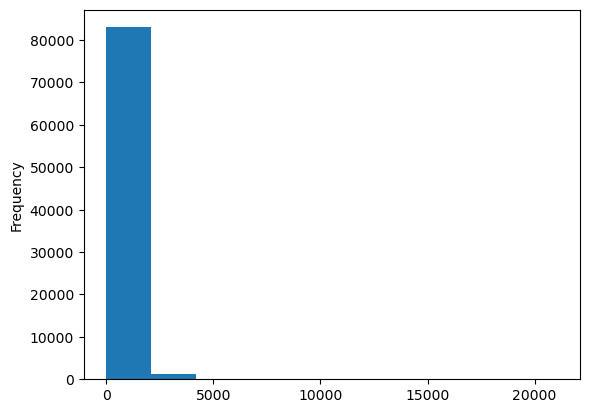

In [101]:
# Plotting a histogram of Total enrolled students and check for outliers
nullregschools['TOTAL'].plot.hist()

<Axes: ylabel='Frequency'>

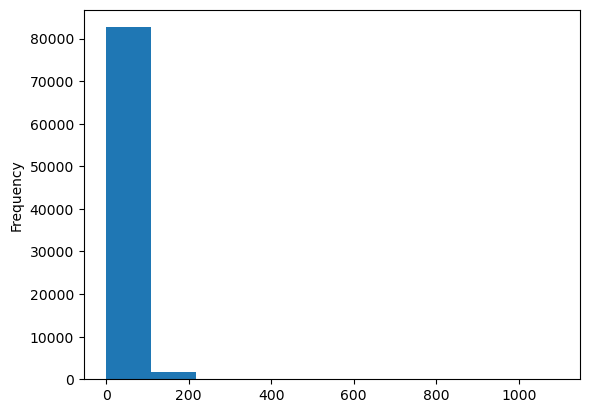

In [102]:
# Plotting a histogram of Total Teachers and check for outliers
nullregschools['FTE'].plot.hist()

<Axes: ylabel='Frequency'>

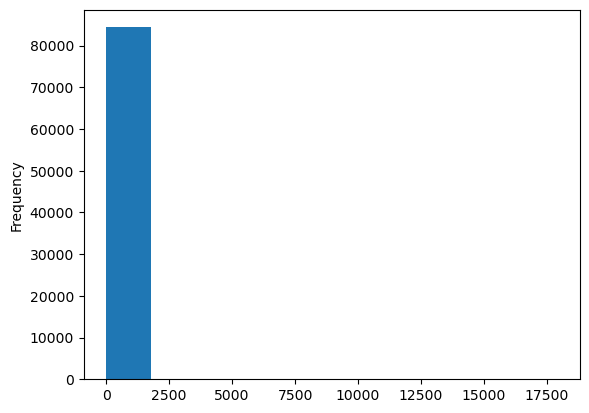

In [103]:
# Plotting a histogram of Student Teacher Ratio and check for outliers
nullregschools['STUTERATIO'].plot.hist()

<Axes: ylabel='Frequency'>

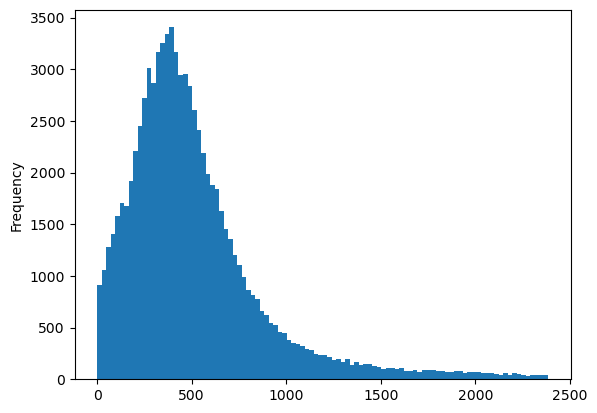

In [104]:
# Re-Plotting a histogram of Total enrolled students after removing 0s and outliers above the 99th quantile
q_low1 = nullregschools['TOTAL'].quantile(0.05)
q_high1 = nullregschools['TOTAL'].quantile(0.99)

filtered_1 = nullregschools[(nullregschools['TOTAL'] > 0) & (nullregschools['TOTAL'] <= q_high1)]

filtered_1["TOTAL"].plot.hist(bins = 100)

<Axes: ylabel='Frequency'>

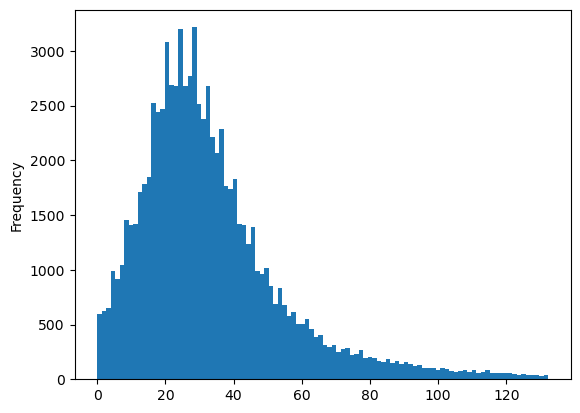

In [105]:
# Re-Plotting a histogram of Total Teachers after removing 0s and outliers above the 99th quantile
q_low2 = nullregschools['FTE'].quantile(0.05)
q_high2 = nullregschools['FTE'].quantile(0.99)

filtered_2 = nullregschools[(nullregschools['FTE'] > 0) & (nullregschools['FTE'] <= q_high2)]

filtered_2["FTE"].plot.hist(bins = 100)



<Axes: ylabel='Frequency'>

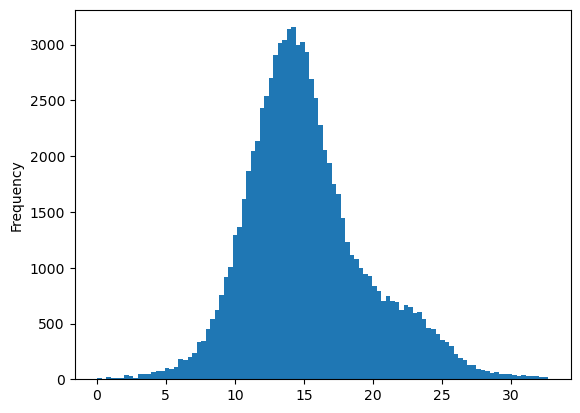

In [106]:
# Re-Plotting a histogram of Student Teacher Ratio after removing 0s and outliers above the 99th quantile
q_low3 = nullregschools['STUTERATIO'].quantile(0.05)
q_high3 = nullregschools['STUTERATIO'].quantile(0.99)

filtered_3 = nullregschools[(nullregschools['STUTERATIO'] > 0) & (nullregschools['STUTERATIO'] <= q_high3)]

filtered_3["STUTERATIO"].plot.hist(bins = 100)



## Correlation Plot to Understand Data Relationships

C:\Users\colmu\AppData\Local\Temp\ipykernel_38936\2162352970.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_df = nullregschools.corr()


<Axes: >

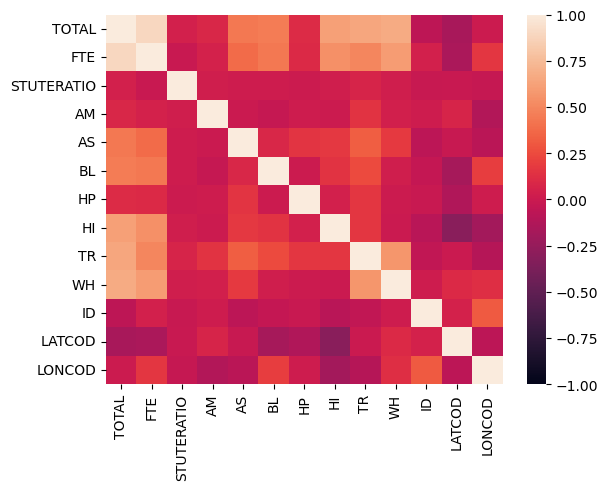

In [107]:
# Using seaborn to generate a correlation heatmap for the columns in the dataframe
correlation_df = nullregschools.corr()
correlation_df

sns.heatmap(correlation_df, vmin=-1, vmax=1)




## Geographic Plots

In [120]:
# The number of schools in each state
regschools['LSTATE'].value_counts()

CA    9067
TX    8352
NY    4598
IL    3877
FL    3685
OH    3442
MI    2968
PA    2857
NC    2620
NJ    2372
MO    2289
GA    2270
WI    2146
WA    2078
AZ    2056
VA    1875
IN    1844
TN    1833
CO    1801
OK    1783
MA    1772
MN    1756
AL    1350
LA    1313
MD    1312
KS    1306
IA    1293
OR    1228
SC    1211
KY    1208
AR    1044
UT    1019
NE    1014
CT     980
MS     888
NM     872
MT     829
PR     804
SD     689
ID     689
NV     683
WV     639
ME     577
ND     542
NH     497
AK     482
WY     348
RI     300
HI     292
VT     289
DC     228
DE     200
GU      43
MP      35
AS      28
VI      22
Name: LSTATE, dtype: int64

<Axes: xlabel='LONCOD', ylabel='LATCOD'>

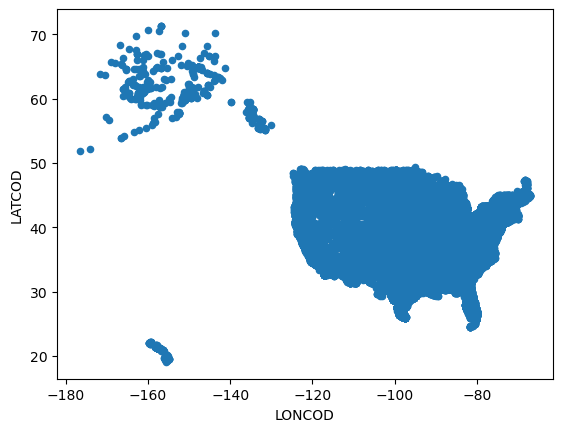

In [121]:
# Plotting only schools from the 50 US states
cont_states = regschools[(regschools['LSTATE'].isin(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']))]

cont_states.plot(kind='scatter', x='LONCOD', y='LATCOD')




<Axes: xlabel='LONCOD', ylabel='LATCOD'>

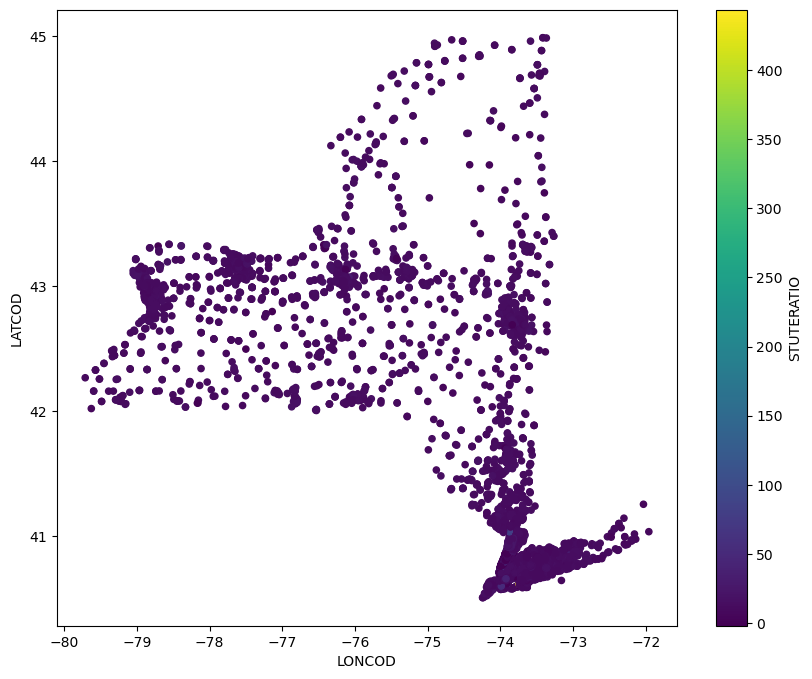

In [200]:
# Plotting only New York schools
state = regschools[(regschools['LSTATE'] == 'NY')]

state.plot(kind='scatter', x='LONCOD', y='LATCOD', figsize=(10,8), c='STUTERATIO')




## School Quality Analysis: Student/Teacher Ratios

In [153]:
# Creating the averages variable
# Showing the highest 5 Student/Teacher ratios
averages = nullregschools.groupby('LSTATE')['STUTERATIO'].mean()

averages.sort_values(ascending=False).head(5)

LSTATE
CA    22.452403
NV    20.807385
AK    20.096674
FL    19.442753
OR    18.677859
Name: STUTERATIO, dtype: float64

In [154]:
# Showing the lowest 5 Student/Teacher ratios
averages.sort_values().head(5)

LSTATE
ME    10.818175
NH    10.830935
WY    10.996379
ND    11.003494
MT    11.189115
Name: STUTERATIO, dtype: float64

In [156]:
# Showing the average for New York
ny_schools = averages.loc[averages.index == 'NY']
ny_schools

LSTATE
NY    12.310833
Name: STUTERATIO, dtype: float64

In [157]:
# The mean of the Student/Teacher Ratio
averages.mean()

14.968736357830823

In [158]:
# The standard deviation of the Student/Teacher Ratio
averages.std()

2.752859860906925

<Axes: xlabel='LSTATE'>

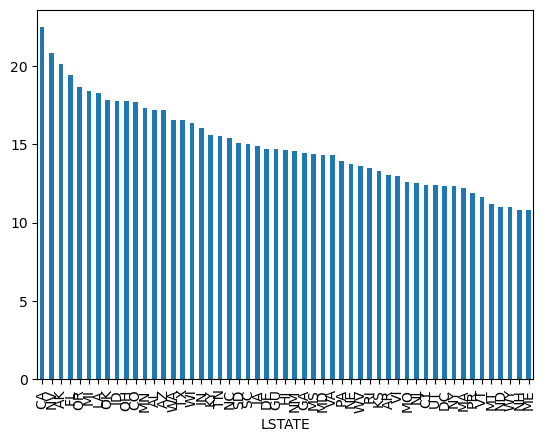

In [164]:
# Plotting the states ratios in descending order
averages.sort_values(ascending=False).plot.bar()

<Axes: >

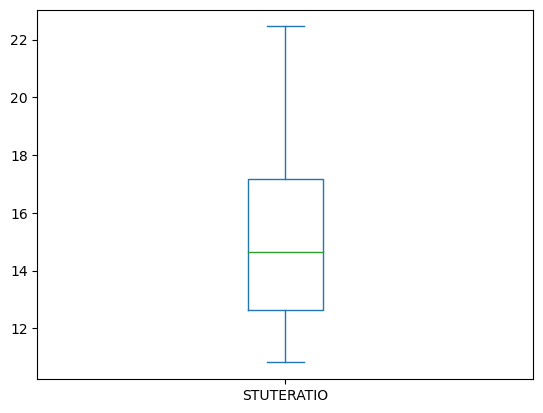

In [166]:
# A boxplot of the Student/Teacher Ratios
averages.plot.box()

<Axes: xlabel='LSTATE'>

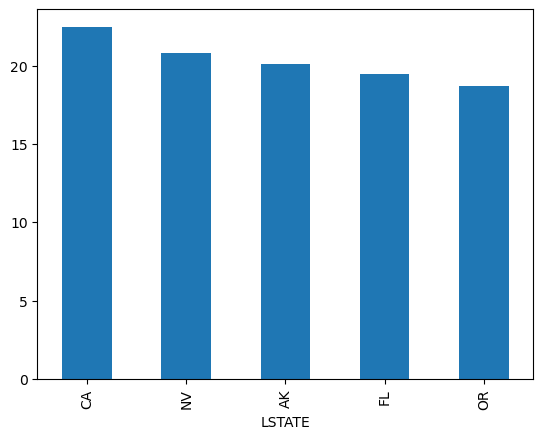

In [167]:
# Plot the Highest 5 states
averages.sort_values(ascending=False).head().plot.bar()

<Axes: xlabel='LSTATE'>

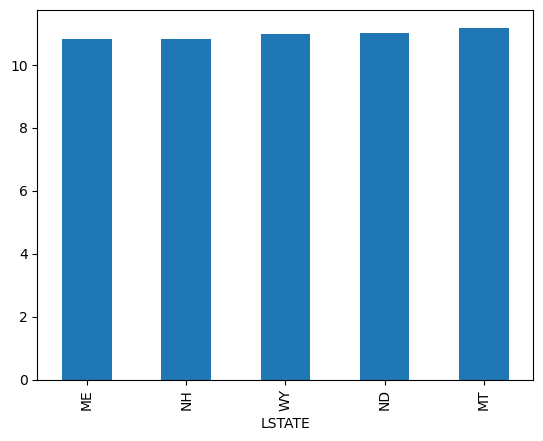

In [168]:
# Plot the lowest 5 states
averages.sort_values().head().plot.bar()

In [169]:
# Printing NY's Student Teacher Ratios
ny_schools = averages.loc[averages.index == 'NY']
ny_schools

LSTATE
NY    12.310833
Name: STUTERATIO, dtype: float64

## Summarize your findings from any of the analysis or plots above:
* One obvious correlation is that there are more schools where there are greater populations, such as in cities. Another finding I noticed is that in the states with the highest ratios they often only had only one school that stood out as a significantly higher value.
* New York had the third highest quantity of schools but was on the lower end of student-teacher ratios.
* I believe I made the right choices in how I cleaned the data, even in retrospect.
* Illinois and Utah both don't share their teacher counts, thus the student-to-teacher ratio was not available.
* Racial analyses could certainly yield some additionally interesting results.